In [1]:
!pip install opencv-python tensorflow

**Face Detection Live**

In [2]:
# Step 1: Install required packages
!pip install -q opencv-python-headless
!pip install -q pyngrok

In [3]:
import cv2
import numpy as np
from PIL import Image
import io
import base64
from IPython.display import display, Javascript
from google.colab.output import eval_js
from IPython.display import Image as IPImage


In [4]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📸 Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

In [19]:
filename = take_photo()

<IPython.core.display.Javascript object>

In [20]:
# Step 5: Load image and detect face
# Load Haar cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [21]:
# Read captured image
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [22]:
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [23]:
# Draw rectangles
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 255), 2)

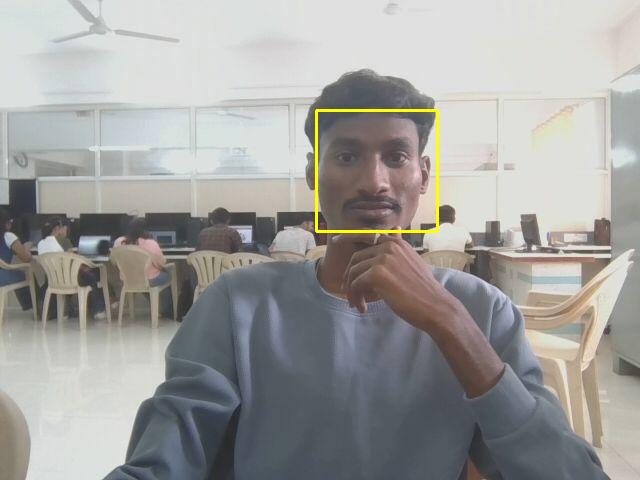

In [24]:
# Convert to RGB and display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Image.fromarray(img_rgb).save("detected.jpg")
display(IPImage("detected.jpg"))